In [10]:
from __future__ import print_function
import sisl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

TranSiesta allows a great variety of contours when performing the equilibrium contours

In this example you will try and create different contours for the equilibrium part.

The default contours are defined like this:

```
%block TS.ChemPot.Left
  mu V/2
  contour.eq
    begin
      C-Left
      T-Left
    end
%endblock TS.ChemPot.Left
%block TS.ChemPot.Right
  mu -V/2
  contour.eq
    begin
      C-Right
      T-Right
    end
%endblock TS.ChemPot.Right

TS.Contours.Eq.Pole 2.5 eV
%block TS.Contour.C-Left
  part circle
   from -40. eV + V/2 to -10 kT + V/2
     points 25
      method g-legendre
%endblock TS.Contour.C-Left
%block TS.Contour.T-Left
  part tail
   from prev to inf
     points 10
      method g-fermi
%endblock TS.Contour.T-Left
%block TS.Contour.C-Right
  part circle
   from -40. eV -V/2 to -10 kT -V/2
     points 25
      method g-legendre
%endblock TS.Contour.C-Right
%block TS.Contour.T-Right
  part tail
   from prev to inf
     points 10
      method g-fermi
%endblock TS.Contour.T-Right
```

### Add a temperature gradient

The default temperatures of the chemical potentials are the Siesta electronic temperature. TranSiesta enables to distinguish the electrodes by their chemical potential *and* their electronic temperature. I.e. the distribution functions of the electrodes may be *very* different:

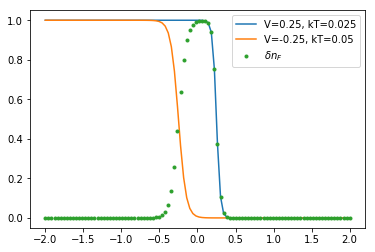

In [20]:
def nf(E, mu, kT):
    return 1 / (1 + np.exp( (E-mu) / kT ))
# Generate two different distributions
E = np.linspace(-2, 2, 100)
plt.plot(E, nf(E, 0.25, 0.025), label='V=0.25, kT=0.025');
plt.plot(E, nf(E, -0.25, 0.05), label='V=-0.25, kT=0.05');
plt.plot(E, nf(E, 0.25, 0.025) - nf(E, -0.25, 0.05), '.', label=r'$\delta n_F$');
plt.legend();

When implementing this in the input-options it will likely fail if one of the electrodes has a temperature higher than the `TS.ElectronicTemperature` (defaults to `ElectronicTemperature`). This is because TranSiesta will fail if one of the tail integrals in the non-equilibrium contour is not at least 5 kT from the respective chemical potential, hence correct the non-equilibrium contour input.

### Reduce number of equilibrium contours

Instead of using 2 contours *per chemical potential* one can reduce it to 2 contours (in total). I.e. the chemical potentials shares the same contours. Note however, in this case one *cannot* use the Gauss-Fermi quadrature for the tail part of the complex contour. Hence choose something different than `g-fermi`.

Copy [example 09](../09/run.ipynb) and adapt the contours such that there are only 2 contours regardless of the applied bias. When testing various contours, you can add `TS.Analyze` to the input to make it quite after the analyzation step. This will also be after the corresponding `siesta.TSCCEQ*` files are created.

You can use the following line to read in the contour data-points:

    CC = sisl.io.TableSile('<>/siesta.TSCCEQ-Left').read_data()
   
where `CC` is a matrix variable with 4 rows:

| `CC[0, :]` | `CC[1, :]` | `CC[2, :]` | `CC[3, :]` | 
| :---: | :---: | :---: | :---: |
| Real energy  | Imaginary energy | Real weight | Imaginary weight |